# Project: Investigate TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I will investigate a data set that contains data on about 10,000 movies from The Movie Database (TMDb). For each movie there is information on popularity, budget, revenue, title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget in 2010 dollars, and revenue in 2010 dollars.

While there are many potential questions we could ask, I will focus on the following questions about run time, genre, vote average, and profitablility:

1) What is the average run time for movies in the dataset?

2) How many movies were there per genre?

3) How has the number of movies per genre changed over time?

4) Which genres had the highest vote average?

5) Which genres were the most profitable?

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [336]:
# Load data and print out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [337]:
#show how many rows and columns are in the dataframe
df.shape

(10866, 21)

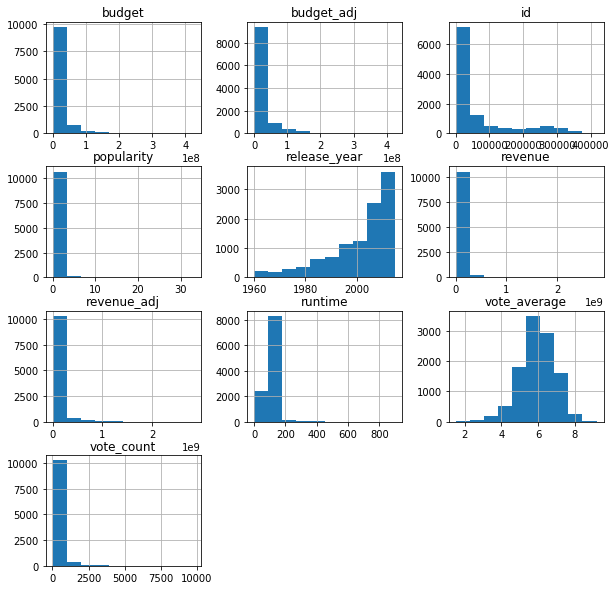

In [338]:
#plot histograms for all metrics
df.hist(figsize=(10,10));

In [339]:
# how many rows are duplicated?
df.duplicated().sum()

1

There's one duplicated row. We'll want to remove this.

In [340]:
# how many rows are null?
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [341]:
# what are the data types for each column
df.dtypes


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [342]:
# how many unique values per column?
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [343]:
# what are unique values for one of the columns, 'vote_average'?
df['vote_average'].unique()

array([6.5, 7.1, 6.3, 7.5, 7.3, 7.2, 5.8, 7.6, 8. , 6.2, 5.2, 7.4, 6.1,
       7. , 6.8, 5.3, 7.8, 6.4, 6.6, 7.7, 5.6, 6.9, 5.9, 6.7, 5.5, 5. ,
       4.4, 5.4, 5.1, 4.8, 5.7, 4.1, 3.9, 4.5, 6. , 4.2, 3.6, 4.3, 4.9,
       4.7, 4. , 3.5, 3.8, 3.3, 3.7, 4.6, 7.9, 8.2, 2.6, 3.1, 8.9, 3.2,
       2.4, 8.4, 3. , 2.8, 3.4, 8.8, 8.1, 8.3, 2.7, 2.5, 2.1, 8.6, 2.9,
       8.5, 9.2, 2.2, 2. , 8.7, 2.3, 1.5])

In [344]:
# what are summary statistics for each of the columns?
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


For one of my questions I'll be using the `runtime` column. The zero value(s) for runtime seem obviously wrong. No movie can have a runtime of zero. We'll need to remove these.



### Data Cleaning: Drop Duplicates, Replace 0 Values For Runtime

In [370]:
df.shape

(10865, 21)

Let's drop the duplicated row.

In [346]:
df.drop_duplicates(inplace=True)

In [347]:
df.shape

(10865, 21)

In [348]:
df.drop_duplicates(inplace=True)

And confirm that it worked.

In [349]:
df.shape

(10865, 21)

Now let's replace the 0 in `runtime` with NaN

In [350]:
df['runtime'].replace(0, np.nan, inplace=True)

And confirm that it worked.

In [351]:
df.describe()['runtime']

count    10834.000000
mean       102.363855
std         30.948225
min          2.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis


### What is average run time?

In [352]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.mean()['runtime']

102.3638545320288

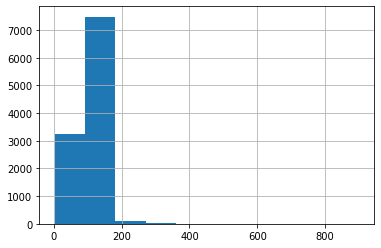

In [353]:
df['runtime'].hist();

Average runtime is 102.4 minutes, about 1 hour and 42 minutes

### How many movies were there per genre? 

In [354]:
# let's create a new dataframe with just the genre column splitting separate columns for each genre listed
df_g = (df['genres'].astype('str').str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_g.head()

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


dd

In [355]:
# now let's reshape the columns and count the values
g = df_g.stack().value_counts()
g

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
nan                  23
dtype: int64

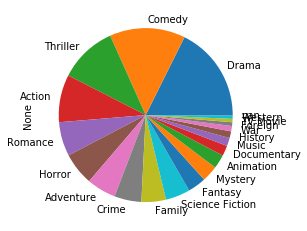

In [356]:
# and let's plot the counts of each genre as a pie chart
g.plot(kind='pie');

Drama, comedy, thriller, action and romance are the most common genres among the movies in this dataset. Note that because the same movie often has multiple genres associated with it, this chart is counting the genre tags rather than the unique movies.

### How has the number of movies per genre changed over time?

In [357]:
# let's join in the release_year column to the genre dataframe
df_y = df['release_year']
df_year_genre = df_g.join(df_y)

In [358]:
# confirm that it worked
df_year_genre.tail()

,genres_1,genres_2,genres_3,genres_4,genres_5,release_year
10861,Documentary,None,None,None,None,1966
10862,Action,Adventure,Drama,None,None,1966
10863,Mystery,Comedy,None,None,None,1966
10864,Action,Comedy,None,None,None,1966
10865,Horror,None,None,None,None,1966


In [359]:
# source - inspired by approach here https://static1.squarespace.com/static/55bfa8e4e4b007976149574e/t/5b998f398a922d8eaecaefd2/1536790332004/investigate-dataset-movies.pdf
df_genres = df.copy()
# split the genres column into a list based on the pipe separator
genres_separate = df['genres'].str.split('|')
genres_separate.head()


0    [Action, Adventure, Science Fiction, Thriller]
1    [Action, Adventure, Science Fiction, Thriller]
2            [Adventure, Science Fiction, Thriller]
3     [Action, Adventure, Science Fiction, Fantasy]
4                         [Action, Crime, Thriller]
Name: genres, dtype: object

In [360]:
# convert into pandas data frame
genres_separate = genres_separate.apply(pd.Series, 1)
genres_separate.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN
2,Adventure,Science Fiction,Thriller,NaN,NaN
3,Action,Adventure,Science Fiction,Fantasy,NaN
4,Action,Crime,Thriller,NaN,NaN


In [361]:
# reshape the data frame from wide to long
genres_separate = genres_separate.stack()
genres_separate.head()

0  0             Action
   1          Adventure
   2    Science Fiction
   3           Thriller
1  0             Action
dtype: object

In [362]:
# drop the second index column
genres_separate = genres_separate.reset_index(level=1, drop=True)
genres_separate.head()

0             Action
0          Adventure
0    Science Fiction
0           Thriller
1             Action
dtype: object

In [363]:
# join the genres separate data frame back with the original data frame
genres_separate.name = 'genres_separate'
genres_separate = df_genres.join(genres_separate)
genres_separate.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_separate
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [364]:
# group by release year
by_year = genres_separate.groupby(['release_year'])
# by_year.first()
# by_year.get_group(1960) 
# by_year['genre_split'].value_counts()
# by_year.head(5)
# by_year.unstack().plot(figsize=(12,12));

In [365]:
# group by release_year and genre_sl
by_year = genres_separate.groupby(['release_year'])['genres_separate'].value_counts()
by_year.head(5)



release_year  genres_separate
1960          Drama              13
              Action              8
              Comedy              8
              Horror              7
              Romance             6
Name: genres_separate, dtype: int64

In [366]:
#reshape the data
by_year = by_year.unstack()
by_year.tail(5)

genres_separate,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
2011,115.0,62.0,46.0,172.0,48.0,49.0,214.0,72.0,46.0,14.0,8.0,78.0,17.0,38.0,75.0,56.0,10.0,146.0,9.0,3.0
2012,99.0,50.0,40.0,176.0,54.0,49.0,232.0,42.0,34.0,6.0,13.0,104.0,22.0,33.0,79.0,54.0,14.0,160.0,10.0,4.0
2013,121.0,67.0,42.0,175.0,71.0,62.0,253.0,48.0,39.0,NaN,14.0,102.0,30.0,38.0,65.0,61.0,10.0,175.0,7.0,3.0
2014,129.0,67.0,36.0,185.0,65.0,73.0,284.0,43.0,36.0,NaN,15.0,105.0,28.0,36.0,84.0,62.0,14.0,179.0,23.0,6.0
2015,107.0,69.0,39.0,162.0,51.0,57.0,260.0,44.0,33.0,NaN,15.0,125.0,33.0,42.0,57.0,86.0,20.0,171.0,9.0,6.0


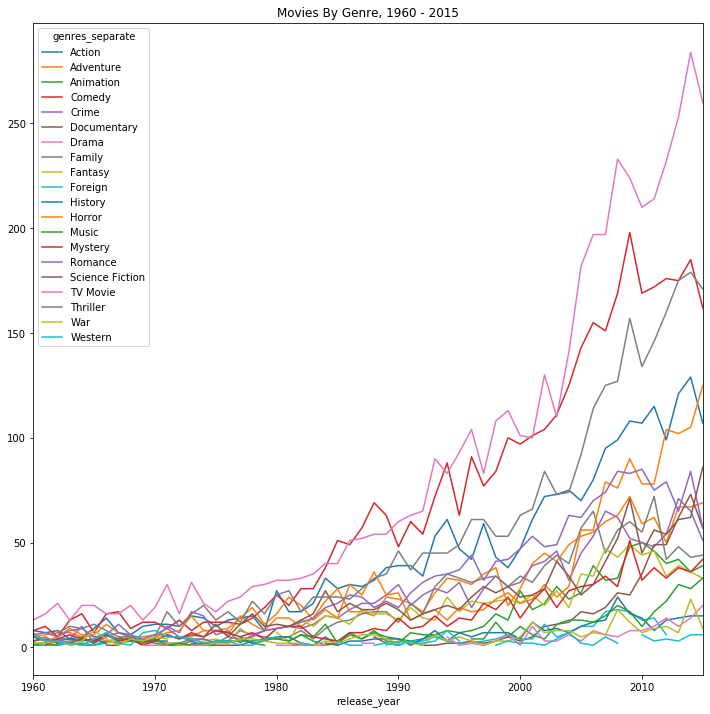

In [367]:
by_year.plot(figsize=(12,12));
plt.title('Movies By Genre, 1960 - 2015');

Interestly, the Drama genre appears to have especially increased in the early 2000s relative to other genres. One thing to bear in mind is that some of these trends could be due to inconsistent genre tagging / labeling through time. For example, if more movies started getting labelled "Drama" that previously would not have been that could account for the trend. This could be an area of further investigation.

### How does vote average vary by genre?

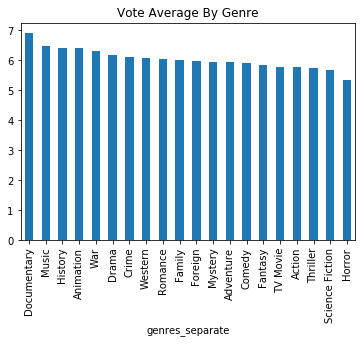

In [368]:
# group by genre and calculate mean vote_average
gs = genres_separate.groupby('genres_separate')['vote_average'].mean()
# sort in descending order and plot bar chart
gs.sort_values(ascending=False).plot(kind='bar');
plt.title('Vote Average By Genre');

Interestingly, Documentary, Music, History, and Animation had the highest vote averages. I suspect these may be some of the genres with smaller audiences. Further investigation could look into the vote count for each of these genres to understand if small sample sizes of dedicated fans may account for some of these trends.

### Which genres were the most profitable?

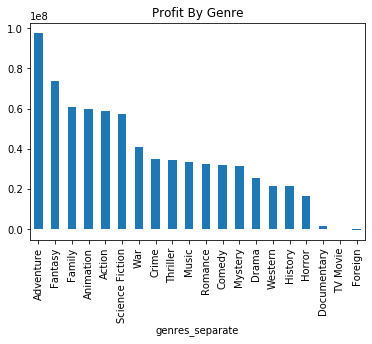

In [369]:
# create new column that calculates the profit
genres_separate['profit'] = genres_separate['revenue_adj'] - genres_separate['budget_adj']

# group by genre and plot
gp = genres_separate.groupby('genres_separate')['profit'].mean()
gp.sort_values(ascending=False).plot(kind='bar');
plt.title('Profit By Genre');

Adventure, Fantasy, Family and Animation were among the most profitable genres amoung the dataset. These genres all strike me as popular and plausibly profitable categories.

<a id='conclusions'></a>
## Conclusions

Some conclusions from initial investigations of the TMDb movie dataset include:
* the average movie run time was about 1 hour and 42 minutes
* Drama, comedy, thriller, action and romance were the most common genres
* the Drama genre is the most popular, and appears to have especially increased in the early 2000s relative to other genres
* Documentary, Music, History, and Animation had the highest vote averages
* Adventure, Fantasy, Family and Animation were among the most profitable genres


Potential limitations of these initial analyses include:
* movies have multiple genres, if there were a way to determine a movie's primary genre we might see different trends
* movies may have been inconsistenly categorized by genre throughout time